# Data Transformation

A process of changing the data distribution of a feature column from one type to another.<br>
Usually done to have control over outliers.

In [4]:
# import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb

In [5]:
# generating non - normal data (exponential distribution) 
np.random.seed(0) 
df = np.random.exponential(size=100,scale=2) 
df = pd.DataFrame(df,columns=['values']) 
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

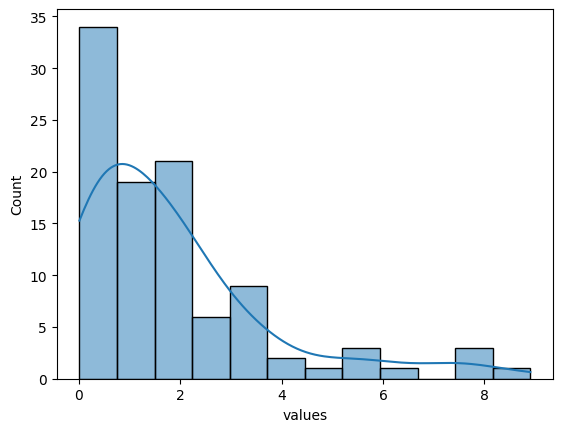

In [6]:
# showcasing the exponential data distribution 
sb.histplot(df['values'],kde=True)

In [7]:
# transforming data using power and quantile transformer 
from sklearn.preprocessing import PowerTransformer,QuantileTransformer 
pt_box_cox = PowerTransformer(method='box-cox',standardize=False) 
pt_yeo_john = PowerTransformer(method='yeo-johnson',standardize=False) 
qt_normal = QuantileTransformer(output_distribution='normal') 

# fitting and transforming data 
df['box_cox'] = pt_box_cox.fit_transform(df[['values']]+1) # Adding 1 because for box_cox values need to be positive 
df['pt_yeo_johnson'] = pt_yeo_john.fit_transform(df[['values']]) 
df['qt'] = qt_normal.fit_transform(df[['values']]) 
df.head()

c:\Users\Sakriya Pyakurel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


,values,box_cox,pt_yeo_johnson,qt
0,1.591749,0.786770,0.786770,0.139710
1,2.511862,0.979086,0.979086,0.764710
2,1.846446,0.848712,0.848712,0.321971
3,1.574402,0.782239,0.782239,0.114185
4,1.102097,0.639388,0.639388,-0.165327


Resultant transformation through values


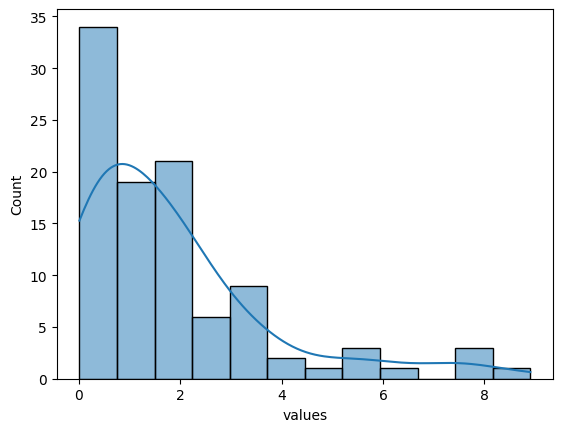

Resultant transformation through box_cox


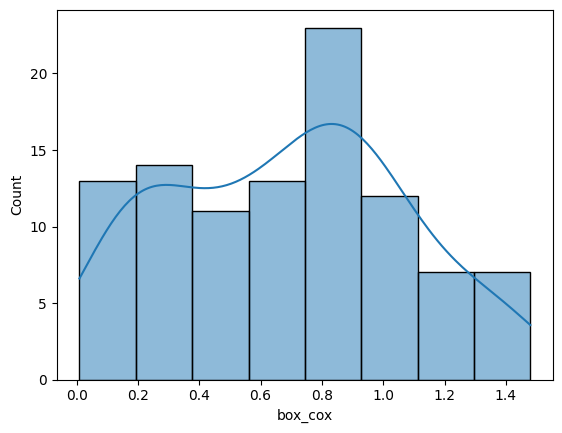

Resultant transformation through pt_yeo_johnson


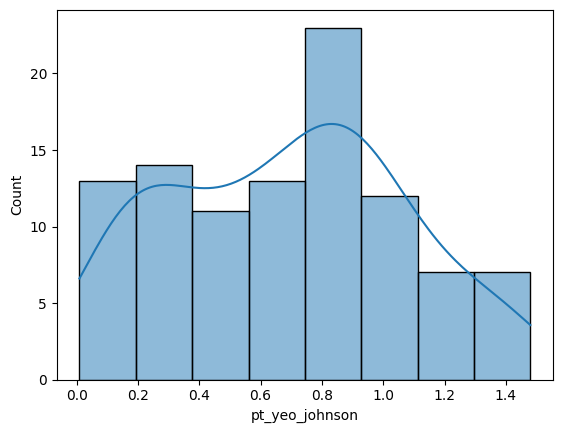

Resultant transformation through qt


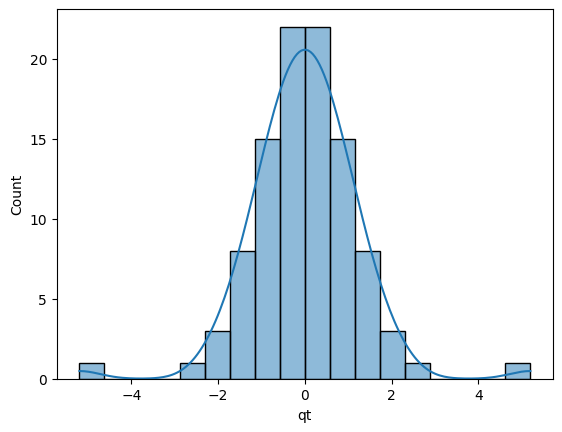

In [9]:
# creating histograms for all columns using hist_plot and kde=true utilizing a loop 
for col in df.columns:
    print(f'Resultant transformation through {col}')
    sb.histplot(df[col],kde=True) 
    plt.show()